# Linear Programming Example with SciPy

Source: http://www.vision.ime.usp.br/~igor/articles/optimization-linprog.html

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.optimize import linprog
from numpy.linalg import solve

import matplotlib as mpl
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 10
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

Problem in consideration

\begin{equation}
\begin{array}{rl}
\text{minimize}&f(x)=c^\top x\\
\text{s. t.}&Ax=b\\
&x\geq0
\end{array}
\end{equation}

A startup want to build talking washing machines spending the least possible. There are three ways of building them: manually, semi-automatically and automatically. The manual production demands 1 minute of qualified work, 40 minutes of non-qualified work and three minutes of assemblage. The work times are 4, 30 and 2 minutos for the semi-automatic method and 8, 20 and 4 minutos for the fully automatic method. A startup has a pool of 4500 minutes of qualified work, 36000 minutos of non-qualified work and 2700 minutos of assembly. The costs of the production are 70, 80 and 85 euros for the manual, semi-automatic and automatic methods.

The variables are the number of machines $x_1$, $x_2$ and $x_3$ built using each method(manual, semi-automatically and automatically). The cost to be minimized is the production cost: $70x_1+80x_2+85x_3$. There are constraints regarding the number of machines to be produced (999) and the capacity of the factory. The complete formulation is show below.



\begin{equation}
\begin{array}{rl}
\textrm{minimize}&f(x) = 70x_1 + 80x_2 +85x_3\\
\text{s. t.}&x_1 + x_2 + x_3 = 999\\
&x_1 + 4x_2 + 8x_3 \leq 4500\\
&40x_1 + 30x_2 + 20x_3 \leq 36000\\
&3x_1 + 2x_2 + 4x_3 \leq 2700\\
&x \geq 0
\end{array}
\end{equation}

<IPython.core.display.Javascript object>


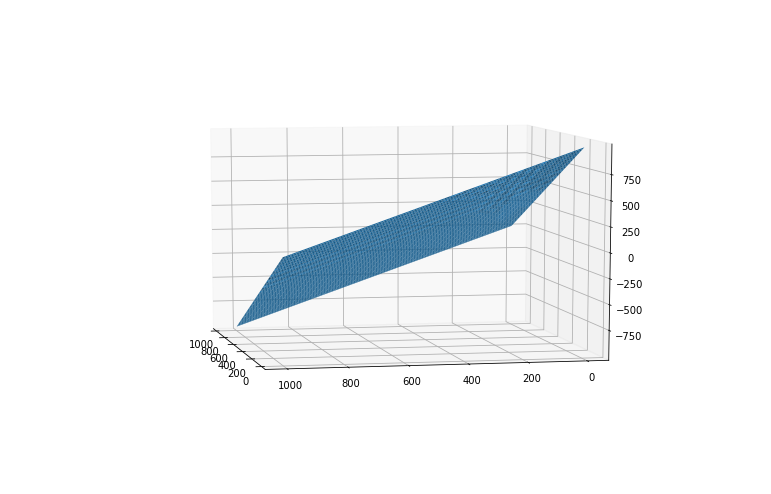

In [3]:
x1 = np.linspace(0, 999, 100)
x2 = np.linspace(0, 999, 100)
x1, x2 = np.meshgrid(x1, x2)
x3 = 999 - x1 - x2

%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, x3, label='parametric curve')


In [3]:
A_eq = np.array([[1,1,1]])
b_eq = np.array([999])

A_ub = np.array([
[1, 4, 8],
[40,30,20],
[3,2,4]])

b_ub = np.array([4500, 36000,2700])

c = np.array([70, 80, 85])

res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,
bounds=(0, None))
print('Optimal value:', res.fun, '\nX:', res.x)

('Optimal value:', 73725.0, '\nX:', array([ 636.,  330.,   33.]))
